# CBSD 2021/2022 PROJECT

## GROUP N.3  
### GROUP COMPONENTS: Jiawei Ma, Zesen Huang, Jiani Wu 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-EDA-(Exploratory-Data-Analysis)" data-toc-modified-id="2.-EDA-(Exploratory-Data-Analysis)-2">2. EDA (Exploratory Data Analysis)</a></span></li><li><span><a href="#3.-Methodology" data-toc-modified-id="3.-Methodology-3">3. Methodology</a></span></li><li><span><a href="#4.Training-Malingering-Detectors" data-toc-modified-id="4.Training-Malingering-Detectors-4">4.Training Malingering Detectors</a></span><ul class="toc-item"><li><span><a href="#4.1.-Grid-Search-&amp;-Cross-Validation" data-toc-modified-id="4.1.-Grid-Search-&amp;-Cross-Validation-4.1">4.1. Grid Search &amp; Cross Validation</a></span></li><li><span><a href="#4.2.-Feature-Engineering" data-toc-modified-id="4.2.-Feature-Engineering-4.2">4.2. Feature Engineering</a></span></li><li><span><a href="#4.3.-Model-Training" data-toc-modified-id="4.3.-Model-Training-4.3">4.3. Model Training</a></span></li><li><span><a href="#4.4.-Model-Interpretation" data-toc-modified-id="4.4.-Model-Interpretation-4.4">4.4. Model Interpretation</a></span></li></ul></li><li><span><a href="#5.-Training-Reconstruct-Models" data-toc-modified-id="5.-Training-Reconstruct-Models-5">5. Training Reconstruct Models</a></span><ul class="toc-item"><li><span><a href="#5.1.-Reconstruction-Models" data-toc-modified-id="5.1.-Reconstruction-Models-5.1">5.1. Reconstruction Models</a></span></li><li><span><a href="#5.2.-Evaluation-Metric" data-toc-modified-id="5.2.-Evaluation-Metric-5.2">5.2. Evaluation Metric</a></span></li><li><span><a href="#5.3.-Dataset-Creation" data-toc-modified-id="5.3.-Dataset-Creation-5.3">5.3. Dataset Creation</a></span></li><li><span><a href="#5.4.-Building-SDA(Stacked-Denoising-Autoencoder)-and-Uplift-Modelling" data-toc-modified-id="5.4.-Building-SDA(Stacked-Denoising-Autoencoder)-and-Uplift-Modelling-5.4">5.4. Building SDA(Stacked Denoising Autoencoder) and Uplift Modelling</a></span></li><li><span><a href="#5.5.-Reconstructor-Training" data-toc-modified-id="5.5.-Reconstructor-Training-5.5">5.5. Reconstructor Training</a></span></li></ul></li><li><span><a href="#6.-Reconstruction-Demo" data-toc-modified-id="6.-Reconstruction-Demo-6">6. Reconstruction Demo</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7">References</a></span></li></ul></div>

## 1. Introduction

Prospetive memory (PM) is the ability to remember to perform previously planned avtivities. It is contrasted with retrospective memory (RM), which is a kind of memory that remembering things or events that happened previously in the past. Recently, there are many researches which investigated on measuring the level of these 2 types of memory. The most prominent one of such self-rating measures is Prospective and Retrospective Memory Questionnaire (**PRMQ**). It was invented to measure the failures of PM and RM performances.

In this project we are asked to detect **malingerers** among people who have responded to this well-known PRMQ. Malingering is the feigning of psychological or physical ailment for gain, which imposes high costs on society, especially on the criminal-justice system[<sup>[1]</sup>](#refer-anchor-1). In the PRMQ, there are 16 questions in total, 8 of which are about PM and 8 are about RM. People are prone to lie because of potential benefits they could gain from faking (faking bad), this is still an open problem in forensic psychology and being able to detect malingers would be very valuable. The main tasks are:
-	Malingering detection;
-	Reconstruction of honest profile, that is starting from malinger’s responses we reconstruct the questionnaire results they would give in a sincere setting.

We tried to solve these problems by using Machine Learning or Deep Learning algorithms.


#### Contributions
We first did the Exploratory Data Analysis (EDA) to study the characteristics and distribution of the data. In order to find the best detection model among several methods, we used Grid Search to select the best model with the highest accuracy. According to the model results, question 8 and question 2 are the most important features for detecting the malingering. Then for the answers which are revealed to be dishonest in the detection process, we tried many deep learning models to reconstruct honest answers. 

---  
Load libraries

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV,cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import warnings
import tensorflow as tfa
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style("whitegrid")

## 2. EDA (Exploratory Data Analysis)

The dataset records the questionnaire responses of 702 participants. There are 16 questions in the questionnaire, and they can be classified as ***Prospective/Retrispective and Short-term/Long-term and Self-cued/Environment Cued at the same time***. For example, PRMQ_PR_SH_CU1 means this item is from PRMQ dataset and it is classified as Prospective, Short-term and Self-cued. 702 participants were asked to answer the questionnaire twice: the first time answered honestly(H), the second time faked a memory deficit(D), and whether they were honest or not was marked. So, there are ***17 columns and 1,404 rows of data*** in the dataset. Every question has a score ranges from 1 to 5, and we expect liars would give higher responses than truth-tellers because they have to exaggerate their memory symptoms.

In [2]:
data = pd.read_csv("PRMQ_df.csv")
data

,PRMQ_PR_SH_CU1,PRMQ_RE _LO_ENV2,PRMQ_PR_SH_ENV3,PRMQ_RE_SH_CU4,PRMQ_PR_LO_CU5,PRMQ_RE_SH_ENV6,PRMQ_PR_LO_ENV7,PRMQ_RE_LO_CU8,PRMQ_RE_LO_ENV9,PRMQ_PR_SH_ENV10,PRMQ _RE_SH_CU11,PRMQ_PR_LO_ENV12,PRMQ _RE_SH_ENV13,PRMQ _PR_LO_CU14,PRMQ_RE_LO_CU15,PRMQ_PR_SH_CU16,CONDITION
0,4,3,2,4,4,2,3,2,3,3,4,4,2,4,4,4,H
1,3,1,1,3,1,4,4,2,5,3,4,1,2,4,3,4,H
2,3,2,2,4,5,1,1,4,2,4,5,2,1,5,2,4,H
3,4,1,2,4,3,1,1,3,4,3,4,3,2,5,4,4,H
4,4,3,3,4,3,2,5,3,4,5,4,3,3,3,2,5,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2,4,4,2,4,5,5,5,1,5,1,5,4,4,5,4,D
1400,5,5,4,5,5,4,5,5,5,5,5,5,5,5,5,5,D
1401,4,4,4,5,5,5,5,5,1,5,5,5,4,4,4,5,D
1402,4,4,4,5,2,4,4,3,2,5,3,2,5,5,4,4,D


In [3]:
new_col_names = []
for name in data.columns:
    if name!="CONDITION":
        new_col_names.append('_'.join(name.split('_')[1:]))
new_col_names.append("CONDITION")

data.columns = new_col_names
data

,PR_SH_CU1,RE _LO_ENV2,PR_SH_ENV3,RE_SH_CU4,PR_LO_CU5,RE_SH_ENV6,PR_LO_ENV7,RE_LO_CU8,RE_LO_ENV9,PR_SH_ENV10,RE_SH_CU11,PR_LO_ENV12,RE_SH_ENV13,PR_LO_CU14,RE_LO_CU15,PR_SH_CU16,CONDITION
0,4,3,2,4,4,2,3,2,3,3,4,4,2,4,4,4,H
1,3,1,1,3,1,4,4,2,5,3,4,1,2,4,3,4,H
2,3,2,2,4,5,1,1,4,2,4,5,2,1,5,2,4,H
3,4,1,2,4,3,1,1,3,4,3,4,3,2,5,4,4,H
4,4,3,3,4,3,2,5,3,4,5,4,3,3,3,2,5,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2,4,4,2,4,5,5,5,1,5,1,5,4,4,5,4,D
1400,5,5,4,5,5,4,5,5,5,5,5,5,5,5,5,5,D
1401,4,4,4,5,5,5,5,5,1,5,5,5,4,4,4,5,D
1402,4,4,4,5,2,4,4,3,2,5,3,2,5,5,4,4,D


Calculate ***the most frequent*** value for each question type:

In [4]:
data_mode = data.groupby('CONDITION')\
                .agg(pd.Series.mode)
data_mode.insert(0,'CONDITION',["D","H"]) # useful columns for data plot
data_mode

,CONDITION,PR_SH_CU1,RE _LO_ENV2,PR_SH_ENV3,RE_SH_CU4,PR_LO_CU5,RE_SH_ENV6,PR_LO_ENV7,RE_LO_CU8,RE_LO_ENV9,PR_SH_ENV10,RE_SH_CU11,PR_LO_ENV12,RE_SH_ENV13,PR_LO_CU14,RE_LO_CU15,PR_SH_CU16
CONDITION,,,,,,,,,,,,,,,,,
D,D,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
H,H,2,1,2,2,2,1,2,2,2,2,2,2,1,2,2,2


Draw two curves, honest and dishonest resp., from ***mode*** values:

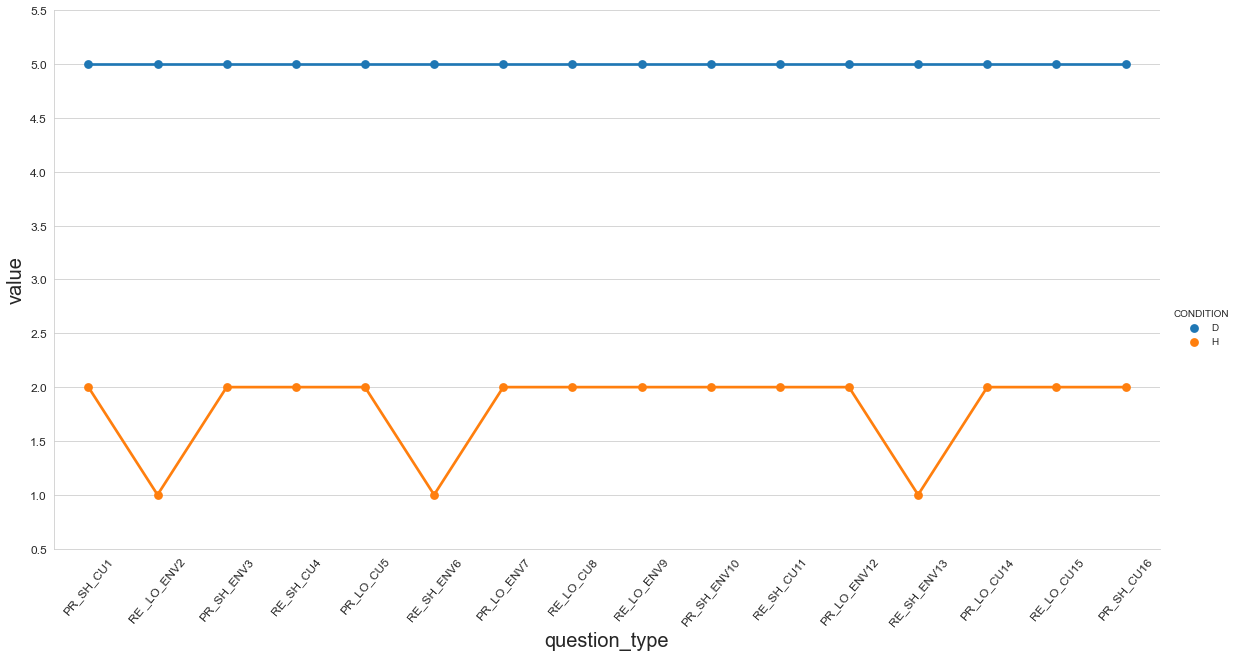

In [5]:
plt_mode = sns.catplot(
        data=pd.melt(data_mode, id_vars=['CONDITION'],var_name='question_type'),
        x="question_type", y="value",
        hue="CONDITION",
        kind='point',aspect=2,height=8
        )
plt_mode.set_xlabels(fontsize=20)
plt_mode.set_xticklabels(rotation=50,fontsize=12)
plt_mode.set_ylabels(fontsize=20)
plt_mode.set_yticklabels(fontsize=12)
plt.show()

As we can see, the most frequent value for each question of dishonest answer is 5, while the most honest answers are 2 except RE_LO_ENV2, RE_SH_ENV6 and RE_SH_ENV13 have value of 1.

We do the same thing for the ***average*** scores:

In [6]:
data_mean = data.groupby('CONDITION').mean()
data_mean.insert(0,'CONDITION',["D","H"]) # useful columns for data plot
data_mean

,CONDITION,PR_SH_CU1,RE _LO_ENV2,PR_SH_ENV3,RE_SH_CU4,PR_LO_CU5,RE_SH_ENV6,PR_LO_ENV7,RE_LO_CU8,RE_LO_ENV9,PR_SH_ENV10,RE_SH_CU11,PR_LO_ENV12,RE_SH_ENV13,PR_LO_CU14,RE_LO_CU15,PR_SH_CU16
CONDITION,,,,,,,,,,,,,,,,,
D,D,4.047009,4.061254,4.025641,4.099715,4.153846,3.974359,3.988604,4.190883,3.961538,4.011396,3.967236,3.990028,3.981481,3.992877,4.076923,4.059829
H,H,2.660969,1.742165,2.269231,2.618234,2.414530,2.019943,2.471510,2.112536,2.740741,2.837607,2.950142,2.481481,1.977208,2.545584,2.257835,2.753561


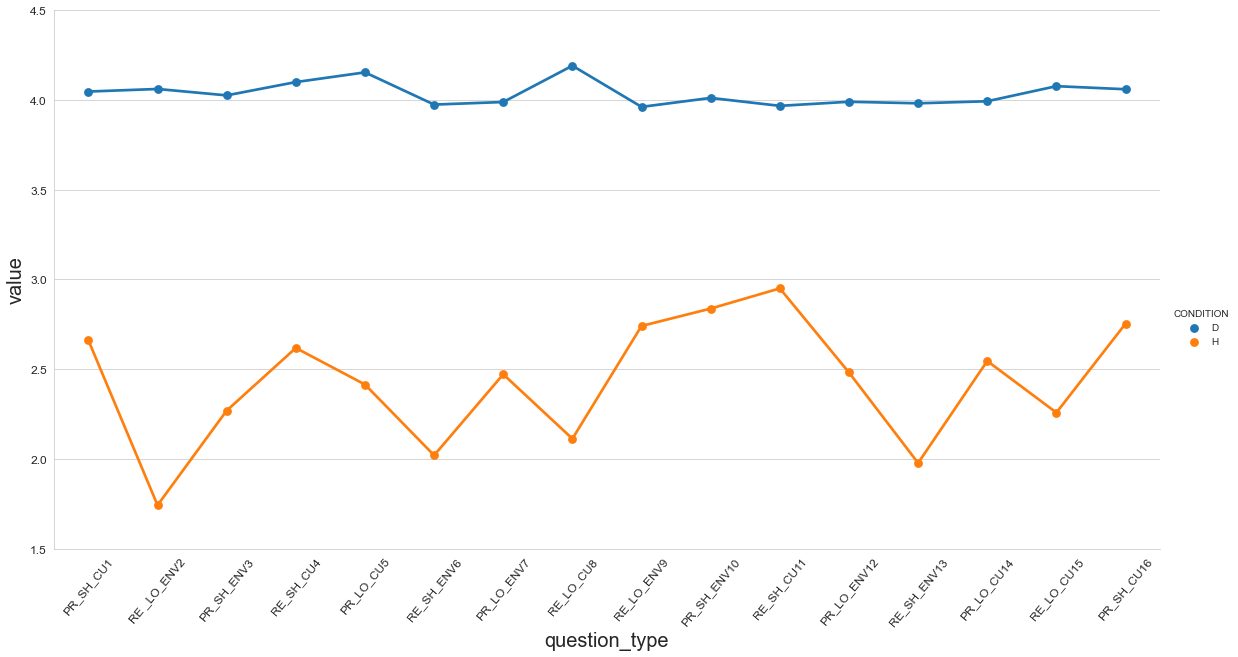

In [7]:
plt_mean = sns.catplot(
        data=pd.melt(data_mean, id_vars=['CONDITION'],var_name='question_type'),
        x="question_type", y="value",
        hue="CONDITION",
        kind='point',aspect=2,height=8
        )
plt_mean.set_xlabels(fontsize=20)
plt_mean.set_xticklabels(rotation=50,fontsize=12)
plt_mean.set_ylabels(fontsize=20)
plt_mean.set_yticklabels(fontsize=12)
plt.show()

As shown in the figure, the average value of dishonest answers for each question is around 4, higher than the value of honest answers, which meets our expectations at the beginning. Besides, dishonest answers have a smaller fluctuation than honest answers. Finally we observe that ***question 2 and question 8*** are those with the highest average value difference, we keep this observation in mind and then we will see how our detection models treat these two exceptions.

It can be useful to draw ***data distribution plot*** as well:

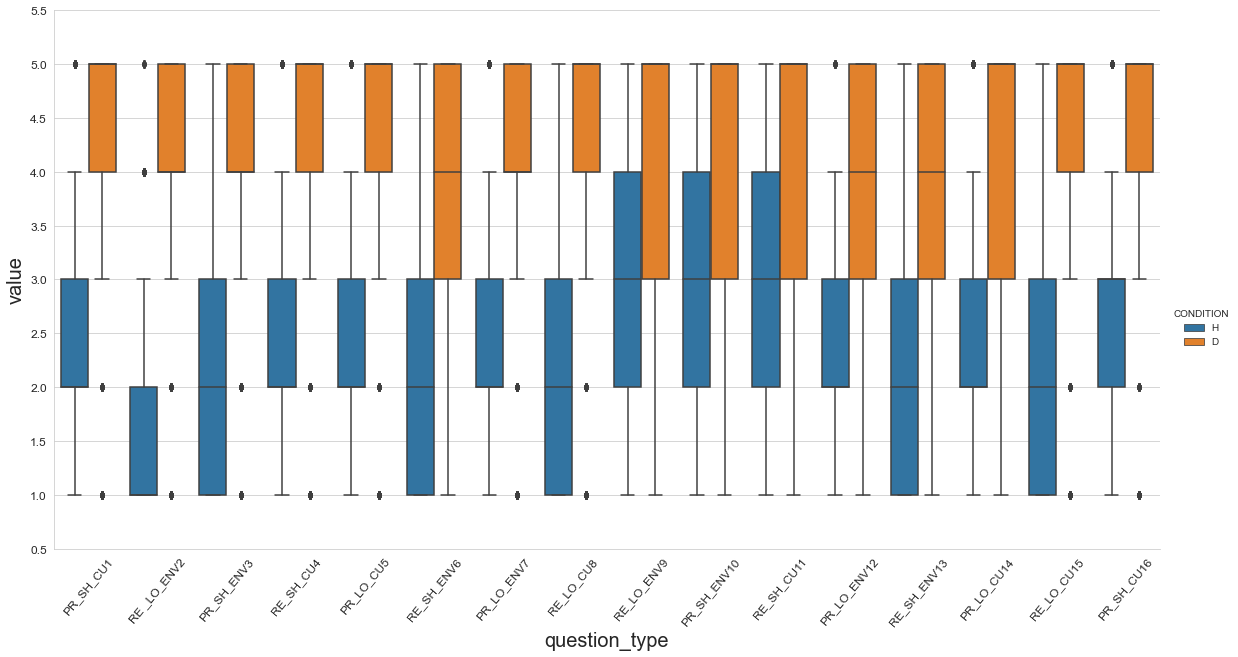

In [8]:
plt_dist = sns.catplot(data=pd.melt(data, id_vars=['CONDITION'],var_name='question_type'),
                      kind="box", x='question_type', y='value', hue='CONDITION',
                      aspect=2,height=8)
#plt_dist.set(ylim=[0,6])
plt_dist.set_xlabels(fontsize=20)
plt_dist.set_xticklabels(rotation=50,fontsize=12)
plt_dist.set_ylabels(fontsize=20)
plt_dist.set_yticklabels(fontsize=12)
plt.show()

From the ***box plot***, we can learn that the value of honest answers for some questions are more dispersed, they range from 1 to 4, while the value of dishonest answers range from 3 to 5. Moreover, no matter honest or dishonest answers, some of them have outliers.



Preparation for ***correlation plots***:

In [9]:
# Extract only scores for each honest person and malingers
data_h = data[data['CONDITION']=='H'].drop(columns=['CONDITION'])
data_d = data[data['CONDITION']=='D'].drop(columns=['CONDITION'])

# Rename the column names to distinguish honest responses from malingering responses
new_names_h = []
new_names_d = []
for name in data_h.columns:
    new_names_h.append(name+'_H')
    new_names_d.append(name+'_D')
data_h.columns = new_names_h
data_d.columns = new_names_d

***'honest vs honest'***

<AxesSubplot:>

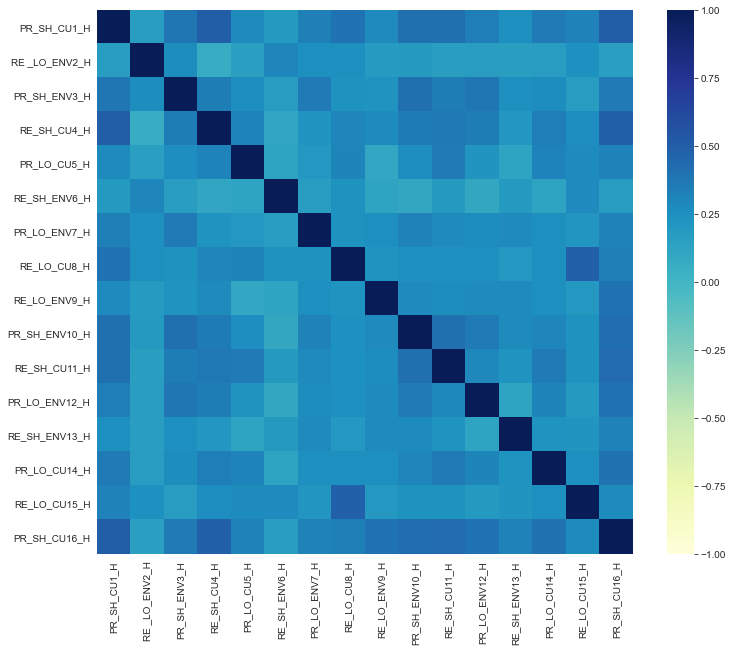

In [10]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data_h.corr(), ax=ax, cmap="YlGnBu", vmin=-1, vmax=1)

According to the ***heatmap***, there is a slight positive correlation between the different questions answered honestly by the participants. However, there is a stronger positive correlation between PR_SH_CU16_H and PR_SH_CU1_H, RE_LO_CU8_H and RE_LO_CU15_H and so on. The reason for strong positive correlations here is that some items are classified into the same category, like PR_SH_CU16_H and PR_SH_CU1_H are Prospective, Short-term and Self-cued.


***'malingers vs malingers'***

<AxesSubplot:>

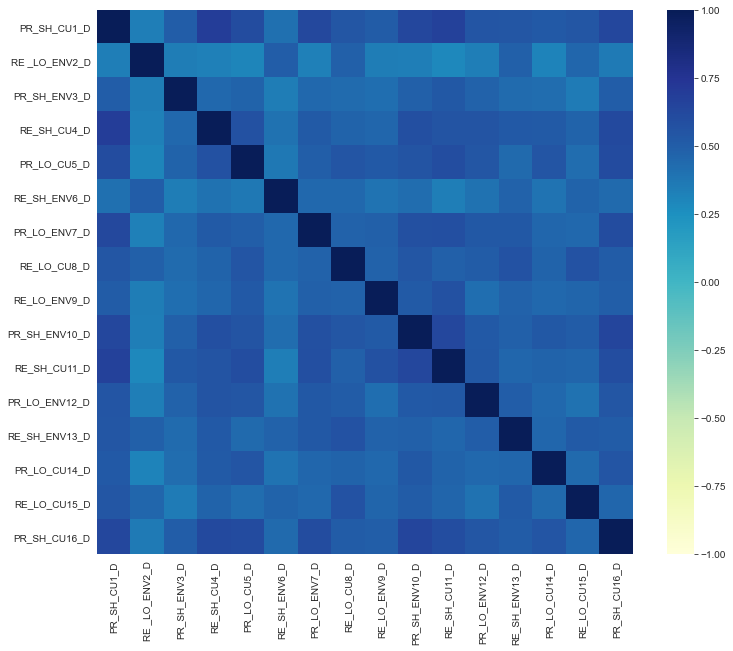

In [11]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data_d.corr(), ax=ax, cmap="YlGnBu", vmin=-1, vmax=1)

When applying the heatmap to different questions answered dishonestly, we can see there is a strong positive correlation, which implies that dishonest answers share the similar pattern. Note that the strong positive correlation here doesn't necessarily mean there's a linear relationship, it also could be non-linear.







***'malingers vs honest'***

<AxesSubplot:>

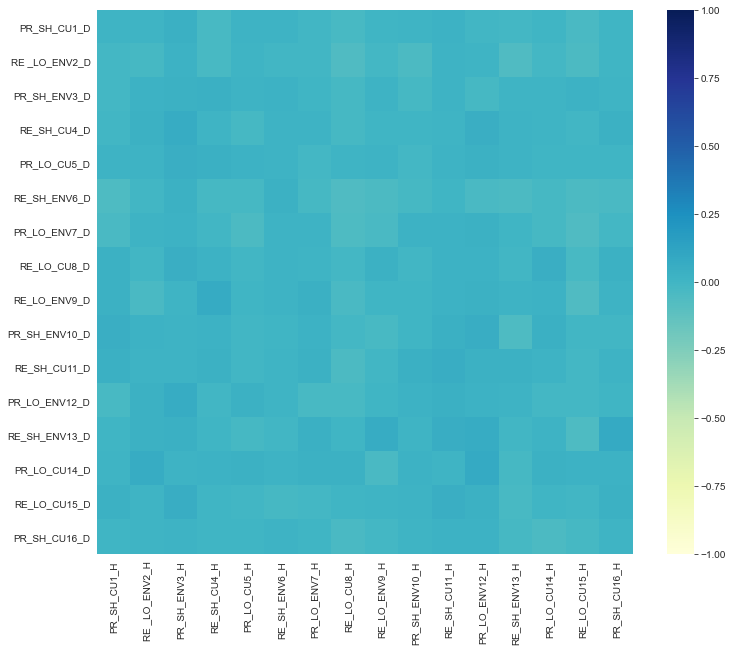

In [12]:
def corr(df1, df2):
    n = len(df1)
    v1, v2 = df1.values, df2.values
    sums = np.multiply.outer(v2.sum(0), v1.sum(0))
    stds = np.multiply.outer(v2.std(0), v1.std(0))
    return pd.DataFrame((v2.T.dot(v1) - sums / n) / stds / n,
                        df2.columns, df1.columns)

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr(data_h,data_d), ax=ax, cmap="YlGnBu", vmin=-1, vmax=1)

As shown in the figure, there is almost no correlation between questions answered honestly and questions answered dishonestly. From this we can deduce ***non-linear*** relashionship between the variables.

## 3. Methodology

According to the goals we approached this problem as in the suggested paper [<sup>[5]</sup>](#refer-anchor-5), but we'll try different algorithms that better accomplish this task.

The entire procedure is depicted in the figure below. Basically, we feed the input data into a ***detector*** to filter out malinger's responses then the latter data will be sent to a ***reconstructor***, the final output will be reconstructed scores. We will find best models for each component separately.

<img src="procedure.png" style="margin-left: auto; margin-right: auto; width:70%;"/>

Regarding ML/DL framework utilized in this project, we chose the most popular ones: ***Scikit-Learn and Tensorflow***.

## 4.Training Malingering Detectors

In this section we focused on detector training leveraging novel ML models. The model list is the following:
- [KNN](https://scikit-learn.org/stable/modules/neighbors.html#neighbors)
- [SVM](https://scikit-learn.org/stable/modules/svm.html#svm)
- [Decision Tree](https://scikit-learn.org/stable/modules/tree.html#tree)
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
- [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)
- [Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)
- [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier )
- [Feed Forward Neural Network](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised)

We can categorize the above models into ***interpretable and black-box*** models. A model has high interpretability when we are able to describe how this model makes predictions, this is very useful either in model evaluation-whether the predictions come from a reasonable data processing procedure- or in explaining the results to non-technical people. However black-box models perform better in most of the cases. 

### 4.1. Grid Search & Cross Validation

Selecting the right hyperparameters for a ML model is usually the toughest task in a project, many selection techniques are available-Random Search, Bayesian Optimization ecc.-, since the dataset is small and balanced then we decided to pick the most expansive one: ***Grid Search(GS)***. Due to the same reason we combined GS with ***10-fold Cross Validation*** because it is not convenient to split the data into a test and training set. So the best hyperparameters will be those with which the models would have the ***highest average(10-fold) accuracy***. 

###  4.2. Feature Engineering

Following the standard ML project's procedure the next step would be the feature engineering. Since we had no prior domain knowledge then here we only considered ***Principal Component Analysis (PCA)*** and ***Input Data Standardization***:   
- PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. Through PCA, we transform high-dimensional data into low-dimensional data and extract the main feature components of the data. The hope is that working with low-dimensional feature space our models will be able to easily extract relevant patterns from data.   
- Data Standarization is a very often used data preprocessing technique, because there are studies showing that it helps a lot in the model training phase, especially in DL field(Neural Networks). It consists of removing the dataset mean value from input data and scaling them to have unit variance globally.

### 4.3. Model Training 

During model training, we tried PCA and standardization to evaluate if they have better performance than using raw data.

***Data preparation:***

In [13]:
# Prepare the data: feature matrix and target
y = (data['CONDITION'].to_numpy() == 'D').astype(int) # H->0, D->1
X = data.drop(columns=['CONDITION'])

scoring = ('recall','accuracy','roc_auc','precision') # Metrics for which the models will be evaluated
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=666) # Set seed for fair acomparison

warnings.filterwarnings('ignore') # Ignore useless warnings

***Main code GS PCA training*** (may take some time) ***:***

In [16]:
names = [
    "Nearest Neighbors",
    "SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "QDA",
    "Gradient Boosting",
    "Feed Forward Neural Network"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    MLPClassifier()
] # The models must match the names defined in 'names'

# Parameters of pipelines can be set using ‘__’ separated parameter names:
parameters = [{'Nearest Neighbors__n_neighbors': range(2,7),"pca__n_components": [3,5,10,16]},
             {'SVM__kernel':['rbf','sigmoid','linear'],'SVM__random_state':[666],"pca__n_components": [3,5,10,16]},
             {'Decision Tree__max_depth': range(2,7),'Decision Tree__random_state':[666],"pca__n_components": [3,5,10,16]},
             {'Random Forest__max_depth': range(2,5), 'Random Forest__n_estimators':range(8,12),'Random Forest__random_state':[666],"pca__n_components": [3,5,10,16]},
             {'AdaBoost__n_estimators':[50, 80],'AdaBoost__learning_rate':[0.1,0.3,0.8], 'AdaBoost__random_state':[666],"pca__n_components": [3,5,10,16]},
             {'QDA__reg_param':[0],"pca__n_components": [3,5,10,16]},
             {'Gradient Boosting__n_estimators':[50,80], 'Gradient Boosting__learning_rate':[0.1,0.3,0.8],'Gradient Boosting__max_depth':[3,5],'Gradient Boosting__random_state':[666],"pca__n_components": [3,5,10,16]},
             {'Feed Forward Neural Network__hidden_layer_sizes':[(20,30),(30,40),(20,30,20)],
              'Feed Forward Neural Network__solver':['sgd','adam'],'Feed Forward Neural Network__learning_rate_init':[1e-2,1e-3],'Feed Forward Neural Network__random_state':[666], 'Feed Forward Neural Network__max_iter':[300],"pca__n_components": [3,5,10,16]}]


for i in range(len(names)):
    print(f'############# {names[i]} ################')
    pca = PCA()
    pipe = Pipeline(steps=[("pca", pca), (names[i], classifiers[i])])
    
    gs = GridSearchCV(
            pipe,
            param_grid=parameters[i],
            scoring=scoring,
            refit="accuracy", # Evaluation is based on this metric!
            cv=cv
    )
    gs.fit(X, y)


    print(f'Best parameters: {gs.best_params_}')
    acc = max(gs.cv_results_['mean_test_accuracy'])
    print(f'Best mean accuracy: {acc}')
    precision = max(gs.cv_results_['mean_test_precision'])
    print(f'Best mean precision: {precision}')
    recall = max(gs.cv_results_['mean_test_recall'])
    print(f'Best mean recall: {recall}')
    auc = max(gs.cv_results_['mean_test_roc_auc'])
    print(f'Best mean AUC: {auc}')
    print('###########################################')
    print('')

############# Nearest Neighbors ################
Best parameters: {'Nearest Neighbors__n_neighbors': 6, 'pca__n_components': 5}
Best mean accuracy: 0.9059422492401215
Best mean precision: 0.9457831418992562
Best mean recall: 0.897364185110664
Best mean AUC: 0.9590346363897672
###########################################

############# SVM ################
Best parameters: {'SVM__kernel': 'rbf', 'SVM__random_state': 666, 'pca__n_components': 16}
Best mean accuracy: 0.9194630192502533
Best mean precision: 0.9410795601772675
Best mean recall: 0.89738430583501
Best mean AUC: 0.9713272492095429
###########################################

############# Decision Tree ################
Best parameters: {'Decision Tree__max_depth': 5, 'Decision Tree__random_state': 666, 'pca__n_components': 5}
Best mean accuracy: 0.903774062816616
Best mean precision: 0.9299547034838278
Best mean recall: 0.8830784708249497
Best mean AUC: 0.9432394366197183
###########################################

###########

***Main code GS with data standardization training:***

In [15]:
names = [
    "Nearest Neighbors",
    "SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "QDA",
    "Gradient Boosting",
    "Feed Forward Neural Network"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    MLPClassifier()
] # The models must match the names defined in 'names'

# Parameters of pipelines can be set using ‘__’ separated parameter names:
parameters = [{'Nearest Neighbors__n_neighbors': range(2,7)},
             {'SVM__kernel':['rbf','sigmoid','linear'],'SVM__random_state':[666]},
             {'Decision Tree__max_depth': range(2,7),'Decision Tree__random_state':[666]},
             {'Random Forest__max_depth': range(2,5), 'Random Forest__n_estimators':range(8,12),'Random Forest__random_state':[666]},
             {'AdaBoost__n_estimators':[50, 80],'AdaBoost__learning_rate':[0.1,0.3,0.8], 'AdaBoost__random_state':[666]},
             {'QDA__reg_param':[0]},
             {'Gradient Boosting__n_estimators':[50,80], 'Gradient Boosting__learning_rate':[0.1,0.3,0.8],'Gradient Boosting__max_depth':[3,5],'Gradient Boosting__random_state':[666]},
             {'Feed Forward Neural Network__hidden_layer_sizes':[(20,30),(30,40),(20,30,20)],
              'Feed Forward Neural Network__solver':['sgd','adam'],'Feed Forward Neural Network__learning_rate_init':[1e-2,1e-3],'Feed Forward Neural Network__random_state':[666], 'Feed Forward Neural Network__max_iter':[300]}]

for i in range(len(names)):
    print(f'############# {names[i]} ################')
    scaler = StandardScaler()
    pipe = Pipeline(steps=[("scaler", scaler), (names[i], classifiers[i])])
    
    gs = GridSearchCV(
            pipe,
            param_grid=parameters[i],
            scoring=scoring,
            refit="accuracy", # Evaluation is based on this metric!
            cv=cv
    )
    gs.fit(X, y)
    print(f'Best parameters: {gs.best_params_}')
    acc = max(gs.cv_results_['mean_test_accuracy'])
    print(f'Best mean accuracy: {acc}')
    precision = max(gs.cv_results_['mean_test_precision'])
    print(f'Best mean precision: {precision}')
    recall = max(gs.cv_results_['mean_test_recall'])
    print(f'Best mean recall: {recall}')
    auc = max(gs.cv_results_['mean_test_roc_auc'])
    print(f'Best mean AUC: {auc}')
    print('###########################################')
    print('')

############# Nearest Neighbors ################
Best parameters: {'Nearest Neighbors__n_neighbors': 5}
Best mean accuracy: 0.8988603988603988
Best mean precision: 0.9423170464238472
Best mean recall: 0.8874643874643875
Best mean AUC: 0.9465817698212066
###########################################

############# SVM ################
Best parameters: {'SVM__kernel': 'rbf', 'SVM__random_state': 666}
Best mean accuracy: 0.9188034188034188
Best mean precision: 0.9391905172938387
Best mean recall: 0.896011396011396
Best mean AUC: 0.9705758769139051
###########################################

############# Decision Tree ################
Best parameters: {'Decision Tree__max_depth': 6, 'Decision Tree__random_state': 666}
Best mean accuracy: 0.8903133903133903
Best mean precision: 0.9440921931023962
Best mean recall: 0.8746438746438746
Best mean AUC: 0.9349177687205856
###########################################

############# Random Forest ################
Best parameters: {'Random Forest__ma

***Main code GS training:***

In [16]:
names = [
    "Nearest Neighbors",
    "SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "QDA",
    "Gradient Boosting",
    "Feed Forward Neural Network"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    MLPClassifier()
] # The models must match the names defined in 'names'

parameters = [{'n_neighbors': range(2,7)},
             {'kernel':['rbf','sigmoid','linear'],'random_state':[666]},
             {'max_depth': range(2,7),'random_state':[666]},
             {'max_depth': range(2,5), 'n_estimators':range(8,12),'random_state':[666]},
             {'n_estimators':[50, 80],'learning_rate':[0.1,0.3,0.8], 'random_state':[666]},
             {'reg_param':[0]},
             {'n_estimators':[50,80], 'learning_rate':[0.1,0.3,0.8],'max_depth':[3,5],'random_state':[666]},
             {'hidden_layer_sizes':[(20,30),(30,40),(20,30,20)],
              'solver':['sgd','adam'],'learning_rate_init':[1e-2,1e-3],'random_state':[666], 'max_iter':[300]}]

for i in range(len(names)):
    print(f'############# {names[i]} ################')
    gs = GridSearchCV(
            classifiers[i],
            param_grid=parameters[i],
            scoring=scoring,
            refit="accuracy", # Evaluation is based on this metric!
            cv=cv
    )
    gs.fit(X, y)
    print(f'Best parameters: {gs.best_params_}')
    acc = max(gs.cv_results_['mean_test_accuracy'])
    print(f'Best mean accuracy: {acc}')
    precision = max(gs.cv_results_['mean_test_precision'])
    print(f'Best mean precision: {precision}')
    recall = max(gs.cv_results_['mean_test_recall'])
    print(f'Best mean recall: {recall}')
    auc = max(gs.cv_results_['mean_test_roc_auc'])
    print(f'Best mean AUC: {auc}')
    print('###########################################')
    print('')

############# Nearest Neighbors ################
Best parameters: {'n_neighbors': 4}
Best mean accuracy: 0.8981481481481481
Best mean precision: 0.9397822850016445
Best mean recall: 0.8931623931623932
Best mean AUC: 0.9469090898668365
###########################################

############# SVM ################
Best parameters: {'kernel': 'rbf', 'random_state': 666}
Best mean accuracy: 0.9237891737891738
Best mean precision: 0.9353842369755121
Best mean recall: 0.9116809116809117
Best mean AUC: 0.96812441601174
###########################################

############# Decision Tree ################
Best parameters: {'max_depth': 5, 'random_state': 666}
Best mean accuracy: 0.8896011396011396
Best mean precision: 0.9440921931023962
Best mean recall: 0.8746438746438746
Best mean AUC: 0.9349177687205856
###########################################

############# Random Forest ################
Best parameters: {'max_depth': 4, 'n_estimators': 9, 'random_state': 666}
Best mean accuracy: 0.

In this classification context, accuracy, precision, recall and AUC are calculated respectively.    

We can learn that all models achieve good performance. Regardless of whether the model uses PCA or standardized data or raw data, ***Gradient Boosting*** has the highest accuracy, which is around 93%. When using PCA to process the data, the accuracy of Gradient Boosting is 93.0187%, using standardized data is 93.3723% and using raw data is 93.3713%. All Gradient Boosting models share the same max_depth of 5, n_estimators of 80, learning rate of 0.1 except model with standardizion has learning rate of 0.3.    
As we can see, doing PCA on the dataset didn't improve the accuracy of Gradient Boosting, but made it drop, this implies that when running PCA algorithm we lost more data information other than gaining a "high-quality" low-dimensional feature space. ***However, standardization slightly increases the accuracy of Gradient Boosting.***

### 4.4. Model Interpretation

***We re-trained the best model:***

In [22]:
best_gb = GradientBoostingClassifier(learning_rate=0.3,
                                           max_depth=5,
                                           n_estimators=80,
                                           random_state=666)
scaler = StandardScaler()
best_gb_pipe = Pipeline(steps=[("scaler", scaler), ('best_gb', best_gb)])

print('############# Gradient Boosting with data standardization ################')
score = cross_validate(best_gb_pipe, X, y,
                        scoring=('recall','accuracy','roc_auc','precision'), cv=cv)
acc = np.mean(score['test_accuracy'])
print(f'Accuracy: {acc}')
precision = np.mean(score['test_precision'])
print(f'Precision: {precision}')
recall = np.mean(score['test_recall'])
print(f'Recall: {recall}')
auc = np.mean(score['test_roc_auc'])
print(f'ROC AUC: {auc}')

############# Gradient Boosting with data standardization ################
Accuracy: 0.9315856129685918
Precision: 0.9419739370121223
Recall: 0.9201609657947687
ROC AUC: 0.9767391491807992


With GB model we are able to draw the so-called ***feature importance plot***:

Text(0.5, 1.0, 'Best Detector Feature Importance')

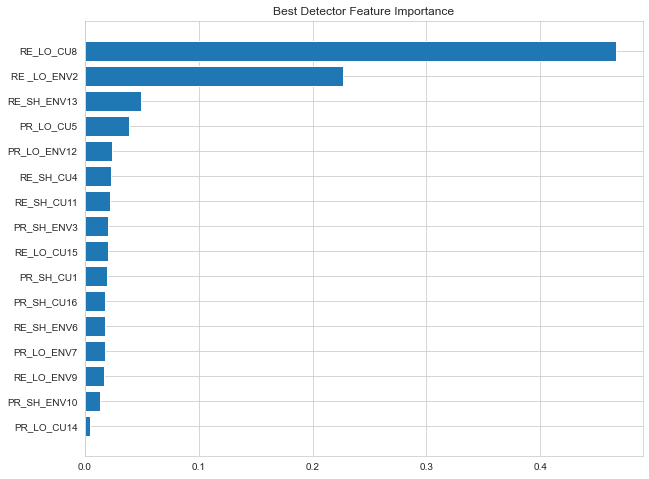

In [23]:
best_gb_pipe.fit(X,y)
feature_importance = best_gb_pipe.named_steps['best_gb'].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(10, 8))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(new_col_names[:-1])[sorted_idx])
plt.title("Best Detector Feature Importance")

As shown in the figure, we can see that the most significant features are ***RE_LO_CU8 and RE_LO_ENV2***, which are the questions:
- "Do you fail to recall things that have happened to you in the last few days?"
- "Do you fail to recognize a place you have visited before?"

These two questions are similar because they are both retrospective and long-term. In other words, these retrospective and long-term scores are features the model looked at for detecting fake profiles. Unfortunately for GB models we have no ways to come up with a plain text rule for human operators, this is what we will try to do in the next sub-section with a less accurate model.

Most importantly, we have the confirmation of the conjecture claimed in the EDA section: ***pronounced value difference between the two scenarios(honest and dishonest responses to some question types) is an anomaly we should pay attention to***, in other words for some questions people are more likely to exagerate when faking. 

***Decision Tree interpretation***

We would also like to see how a decision tree model predicts outcomes based on the features. Since the best tree's hyperparameter (max_depth) found above is 6 but this large tree won't be so straightforward to undertand, then we decided to create a smaller tree model and to calculate the metrics.  

In [33]:
dt = DecisionTreeClassifier(max_depth=2,random_state=666)

print('############# Decision Tree ################')
score = cross_validate(dt, X, y,
                        scoring=('recall','accuracy','roc_auc','precision'), cv=cv)
acc = np.mean(score['test_accuracy'])
print(f'Accuracy: {acc}')
precision = np.mean(score['test_precision'])
print(f'Precision: {precision}')
recall = np.mean(score['test_recall'])
print(f'Recall: {recall}')
auc = np.mean(score['test_roc_auc'])
print(f'ROC AUC: {auc}')

############# Decision Tree ################
Accuracy: 0.8739007092198582
Precision: 0.9410950717546754
Recall: 0.7990945674044265
ROC AUC: 0.9164834722621442


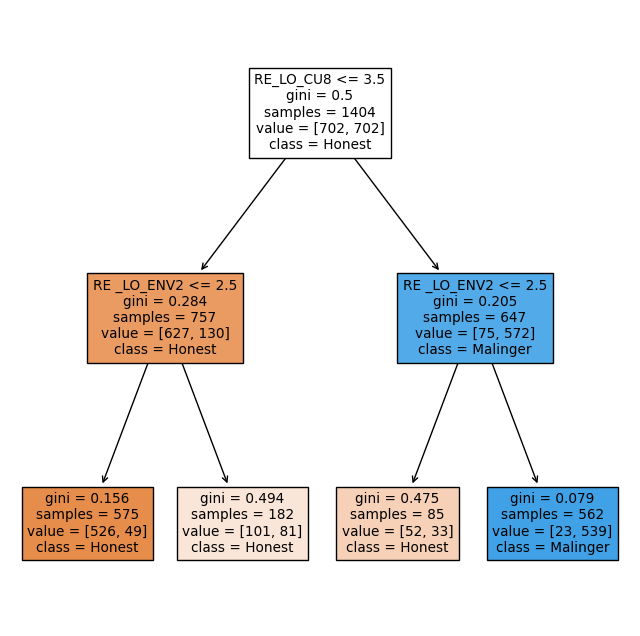

In [30]:
sns.reset_defaults()
dt = DecisionTreeClassifier(max_depth=2,random_state=666)
dt.fit(X,y)
fig = plt.figure(figsize=(8,8))
_ = tree.plot_tree(dt,
              feature_names=new_col_names[:-1],
              class_names=['Honest','Malinger'],
                  filled=True)
plt.show()

We discovered some very interesting results:
- Even if we had a very easy model but we reached a quite satisfactory prediction quality;
- We found the ***same variables*** as the most relevant features in the best model (GB model), but here we had an even more interpretable result;
- Looking at the interpretation plot we can quickly identify the underlying rule that is applied to make predictions:
    - $RE\_LO\_CU8 \leq 3.5 ~ \Rightarrow ~ Honest$
    - $RE\_LO\_CU8 > 3.5 ~ and ~  RE\_LO\_ENV2 \leq 2.5 ~ \Rightarrow ~ Honest$
    - $RE\_LO\_CU8 > 3.5 ~ and ~  RE\_LO\_ENV2 > 2.5 ~ \Rightarrow ~ Malinger$

Basically, when a subject responds to the RE_LO_CU8 with a low score then we could be pretty sure that the subject is a honest person with 55(=757-702) false negatives, whereas when s/he reports a high score in the both RE_LO_CU8 and RE_LO_ENV2 then there is a probability of 87% (=562/647) that the subject is a malinger.

Another important note is that we tried to fit a little bit more deep tree model, but we gained a few percentage points.

## 5. Training Reconstruct Models

### 5.1. Reconstruction Models

In this part, our goal is to predict the honest answers from the fake ones. Recently, many machine learning methods are applied in detecting malingering[<sup>[2]</sup>](#refer-anchor-2)[<sup>[3]</sup>](#refer-anchor-3). We proposed four different solutions in our project, they are computational methods as well as deep learning methods.  
- The simplest one is ***benchmark strategy***, its main idea is to calculate the differences between the average dishonest response and the average honest response for each question. When someone's responses are recognized as dishonest, we substract the differences from the orginal data to get the predicted honest answers.  

- A modification of benchmark strategy would be using ***uplift modelling***, it's becoming very popular especially in the marketing researches, detailed explanations could be found in this Python library [uplift modelling website](https://www.uplift-modeling.com/en/latest/) or in this book [chapter](https://pbiecek.github.io/xai_stories/story-uplift-marketing1.html). This algorithm is commonly used in a classification context but here we'd like to exploit its main charateristics in a regression/reconstruction problem.

    Conceptually, instead of assuming that each subject malingers with same magnitudine (benchmark method) here we tried to compute this deviation ***at individual level*** using the ***two-model*** approach:
    - We train two regressors: HonestRegressor and DisRegressor;
    - The two regressors will be trained using only honest reponses or dishonest ones respectively;
    - When it comes to recover a disonest profile to the corresponding honest one we just calculate the uplift values and the final step is to directly substract these values from the original dishonest scores, similarly to what we do in the benchmark algorithm.
    <br />
    <br />
    <center><img src="uplift.png" width = "60%" /></center>
    <br />
    <br />
    
    For the building blocks of this method, we selected two denoising autoencoders with same hyperparameters/structure as the autoencoder we are going to create nextly, so we can fairly compare the final results, proving if the uplift modelling is really effective or not.

- According to the idea of ***denoising autoencoder***, we constructed our third model. When training the data, our input is the dishonest responses and we take the corresponding honest answers as output. The structure is as follows. From the input layer to the hidden layer in the middle can be seen as a encoding process, while the decoding process is from the hidden layer to the output layer.  
<br/>
<br/>
<center><img src="autoencoder.png" width = "60%" /></center>

- Then we constructed a greedy layer-wise pre-training method, called ***stacked denoising autoencoder*** [<sup>[4]</sup>](#refer-anchor-4). In this case, one autoencoder is trained at first and the predicted answers are our new output in the next autoencoder, while all the autoencoders have the same input. If the training of one autoencoder is finished, it will be freezed before training the next one. After completing training of all autoencoders, they are released and there is a fine-tuning for the whole network. The structure is as follows.
<br/>
<br/>
<center><img src="sda.png" width = "60%" /></center>
<br/>
<br/>

Here we added one more step that is ***restart training***. We found that training multiple time SDAs with the same procedere we could descrease the reconstruction error.

Since benchmark strategy is a straightforward/trivial method, it can be seen as a ***upper bound*** for the other models(the name comes from this idea). So if the performance of one method is worse than benchmark strategy then it should be discarded.   

### 5.2. Evaluation Metric

In order to estimate the performance of our reconstruct models, here we applied ***Root Mean Square Error*** as the evaluation metrics:
$$RMSE=\sqrt{\frac{\sum_{t=1}^T (\hat{y_t}-y_t)^2}{T}}$$  
where $y_t$'s correspond to either reconstructed scores or those recognized as honest responses in the detection phase, $\hat{y_t}$'s are ground truth.

### 5.3. Dataset Creation

When training the reconstruction model, we used the original dishonest data and its corressponding honest data as input and output. But when it comes to testing process, our input is the predicted dishonest data from the detector and it would also contains honest one. So we created two new datasets as follows to make sure every data from the input had its corressponding real honest data.  
<br/>
<center><img src="reconstructor dataset.png" width = "60%" /></center>

Modify the data in a new shape.

In [34]:
dataset_x = data.drop(columns=['CONDITION']).to_numpy().astype(np.float32)
y_1 = data[data['CONDITION']=='H'].replace('H',0)
y_2 = data[data['CONDITION']=='H'].replace('H',1)
dataset_y = pd.concat([y_1,y_2]).to_numpy().astype(np.float32)

### 5.4. Building SDA(Stacked Denoising Autoencoder) and Uplift Modelling

Constructing the model of SDA as well as the single autoencoder.  
In each autoencoder, there are 3 layers for encoding and 3 layers for decoding. Our goal is to capture the information of data through hidden layers.  
In this SDA model, there are 3 autoencoders.

***Autoencoder & SDA***

In [37]:
class SDA():
    def __init__(self, n_input=16, n=3): #n>=1, n: number of autoencoder to stack
        self.autoencoder_l = self.create_sda(n_input, n)
        
    def create_sda(self, n_input=16, n=3): # n>=1, n: number of autoencoder to stack. Return an autoencoder model.
        input_ = keras.Input(shape=(n_input,))
        autoencoder_l = []

        encoded = keras.layers.Dense(64, activation='tanh',kernel_initializer='random_normal',
                                    bias_initializer='ones')(input_)
        encoded = keras.layers.Dense(32, activation='tanh',kernel_initializer='random_normal',
                                        bias_initializer='ones')(encoded)
        encoded = keras.layers.Dense(3, activation='relu',kernel_initializer='random_normal',
                                        bias_initializer='ones')(encoded)

        decoded = keras.layers.Dense(32, activation='tanh',kernel_initializer='random_normal',
                                        bias_initializer='ones')(encoded)
        decoded = keras.layers.Dense(64, activation='tanh',kernel_initializer='random_normal',
                                        bias_initializer='ones')(decoded)
        decoded = keras.layers.Dense(16, activation='relu',kernel_initializer='random_normal',
                                        bias_initializer='ones')(decoded)
        autoencoder_l.append(keras.Model(input_, decoded))
        last_encoded = encoded
        last_decoded = decoded

        for i in range(n-1):
            last_encoded = keras.layers.Dense(64, activation='tanh',kernel_initializer='random_normal',
                                            bias_initializer='ones')(last_decoded)
            last_encoded = keras.layers.Dense(32, activation='tanh',kernel_initializer='random_normal',
                                        bias_initializer='ones')(last_encoded)
            last_encoded = keras.layers.Dense(3, activation='relu',kernel_initializer='random_normal',
                                            bias_initializer='ones')(last_encoded)

            last_decoded = keras.layers.Dense(32, activation='tanh',kernel_initializer='random_normal',
                                        bias_initializer='ones')(last_encoded)
            last_decoded = keras.layers.Dense(64, activation='tanh',kernel_initializer='random_normal',
                                            bias_initializer='ones')(last_decoded)
            last_decoded = keras.layers.Dense(16, activation='relu',kernel_initializer='random_normal',
                                            bias_initializer='ones')(last_decoded)
            autoencoder_l.append(keras.Model(input_, last_decoded))

        return autoencoder_l
                
    def train(self, X, y, batch_size=256,shuffle=True,
              epochs=300, epochs_ft=600, lr=1e-3, lr_ft=1e-4,
             n_train=6): # SDA training
        '''
        epochs_ft: n.epochs for fine-tuning
        lr_ft: lr for fine-tuning
        n_train: how many times to train whole model, it turns out that this way helps to continuosly 
                reduce the training errors but it suffers from overfitting ...
        '''
        
        for _ in range(n_train):
            last_h = y
            
            # Train each autoencoder 'independently'
            for i in range(len(self.autoencoder_l)):
                optimizer = keras.optimizers.Adam(learning_rate=lr)
                self.autoencoder_l[i].compile(optimizer=optimizer, loss='mse',
                                               metrics=[keras.metrics.RootMeanSquaredError()])
                self.autoencoder_l[i].fit(X, last_h,
                                        epochs=epochs, shuffle=shuffle,
                                        batch_size=batch_size, verbose=0)
                last_h = self.autoencoder_l[i].predict(X)
                for layer in self.autoencoder_l[i].layers: layer.trainable = False # freezing all the weights

            for i in range(len(self.autoencoder_l)): 
                for layer in self.autoencoder_l[i].layers: layer.trainable = True # free all the weights
            
            # Fine-tuning
            optimizer = keras.optimizers.Adam(learning_rate=lr_ft)
            self.autoencoder_l[-1].compile(optimizer=optimizer, loss='mse',
                                           metrics=[keras.metrics.RootMeanSquaredError()])
            self.autoencoder_l[-1].fit(X, y,
                                        epochs=epochs_ft, shuffle=shuffle,
                                        batch_size=batch_size, verbose=0)
    def evaluate(self, X, y):
        self.autoencoder_l[-1].evaluate(X, y)
        
    def predict(self, X):
        return self.autoencoder_l[-1].predict(X)

***Uplift Modelling***

In [43]:
class UpliftModel():
    def __init__(self, n_input=16):
        self.n_input = n_input
        self.reg_h = SDA().create_sda(n_input=16, n=1)[0]
        self.reg_d = SDA().create_sda(n_input=16, n=1)[0]
        
    def compile(self, optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                loss='mse',
                metrics=[keras.metrics.RootMeanSquaredError()]):
        self.reg_h.compile(optimizer=optimizer, loss=loss, metrics=metrics)
        self.reg_d.compile(optimizer=optimizer, loss=loss, metrics=metrics)
        
    def train(self, X_h, X_d, batch_size=256,shuffle=True):
        self.reg_h.fit(X_h, X_h, batch_size=batch_size,
                       epochs=300, shuffle=shuffle, verbose=0)
        self.reg_d.fit(X_d, X_d, batch_size=batch_size,
                       epochs=300, shuffle=shuffle, verbose=0)
    
    def up_predict(self, X):
        return self.reg_d.predict(X) - self.reg_h.predict(X)

### 5.5. Reconstructor Training

Here is the main training code consists of both detection process and reconstruction process with cross validation.   
- In the reconstruction process, we trained the real dishonest data as input and the real corressponding honest data as output. Then we took the predicted dishonest data from the detection in the testing section as input to predict the possible honest answers.  
- We trained SDA model for two times to make the model had a higher accuracy in the training section.  
- We estimated the performance of every recontruction model through RMSE, the smaller the value, the better the model.

In [44]:
gb_train_acc = []
gb_train_prec = []
gb_train_rec = []
gb_test_acc = []
gb_test_prec = []
gb_test_rec = []

benchmark_train_rmse = []
benchmark_test_rmse = []

auto_train_rmse = []
auto_test_rmse = []

sda_train_rmse = []
sda_test_rmse = []

uplift_train_rmse = []
uplift_test_rmse = []

for train_idx, test_idx in cv.split(X,y):
    
    train_x = dataset_x[train_idx]
    train_y = dataset_y[train_idx]
    test_x = dataset_x[test_idx]
    test_y = dataset_y[test_idx]
    
    # For the training part 
    d_train_resp = train_x[train_y[:,-1]==1] # extract malingering people's responses
    h_train_resp = train_y[train_y[:,-1]==1][:,:-1] # corrisponding honest people's responses

    # GB model
    best_gb = GradientBoostingClassifier(learning_rate=0.1,
                                           max_depth=3,
                                           n_estimators=80,
                                           random_state=666)
    best_gb.fit(train_x, train_y[:,-1])
    gb_train_pred = best_gb.predict(train_x)
    gb_test_pred = best_gb.predict(test_x)
    gb_d_test_resp = test_x[gb_test_pred==1] # WHEN TEST THE MODEL: extract malingering people's responses
    gb_h_test_resp = test_y[gb_test_pred==1][:,:-1] # WHEN TEST THE MODEL: corrisponding honest people's responses
    gb_train_acc.append(accuracy_score(train_y[:,-1],gb_train_pred))
    gb_train_prec.append(precision_score(train_y[:,-1],gb_train_pred))
    gb_train_rec.append(recall_score(train_y[:,-1],gb_train_pred))
    gb_test_acc.append(accuracy_score(test_y[:,-1],gb_test_pred))
    gb_test_prec.append(precision_score(test_y[:,-1],gb_test_pred))
    gb_test_rec.append(recall_score(test_y[:,-1],gb_test_pred))
    
    # GB model + benchmark strategy
    diff_mean = d_train_resp.mean(axis=0) - h_train_resp.mean(axis=0) # We train the model on entire training dataset
    benchmark_train_pred = train_x.copy() 
    benchmark_train_pred[train_y[:,-1]==1] = d_train_resp - diff_mean
    benchmark_train_rmse.append(np.sqrt(mean_squared_error(benchmark_train_pred,
                               train_y[:,:-1])))
    benchmark_test_pred = test_x.copy()
    benchmark_test_pred[gb_test_pred==1] = test_x[gb_test_pred==1] - diff_mean
    benchmark_test_rmse.append(np.sqrt(mean_squared_error(benchmark_test_pred,
                               test_y[:,:-1]))) # + FALSE NEGATIVE errors!
    
    # GB model + autoencoder
    autoencoder = SDA().create_sda(n_input=16, n=1)[0]
    optimizer = keras.optimizers.Adam(learning_rate=1e-2)
    autoencoder.compile(optimizer=optimizer, loss='mse',
                       metrics=[keras.metrics.RootMeanSquaredError()])
    autoencoder.fit(d_train_resp, h_train_resp,
                    epochs=300,
                    batch_size=256, shuffle=True,
                    verbose=0) # We train the model on entire training dataset
    auto_train_pred = train_x.copy() 
    auto_train_pred[train_y[:,-1]==1] = autoencoder.predict(d_train_resp)
    auto_test_pred = test_x.copy()
    auto_test_pred[gb_test_pred==1] = autoencoder.predict(gb_d_test_resp)
    auto_train_rmse.append(np.sqrt(mean_squared_error(auto_train_pred, train_y[:,:-1])))
    auto_test_rmse.append(np.sqrt(mean_squared_error(auto_test_pred, test_y[:,:-1])))
    
    # GB model + sda
    sda = SDA()
    sda.train(d_train_resp, h_train_resp, n_train=2) # We train the model on entire training dataset
    sda_train_pred = train_x.copy() 
    sda_train_pred[train_y[:,-1]==1] = sda.predict(d_train_resp)
    sda_test_pred = test_x.copy()
    sda_test_pred[gb_test_pred==1] = sda.predict(gb_d_test_resp)
    sda_train_rmse.append(np.sqrt(mean_squared_error(sda_train_pred, train_y[:,:-1])))
    sda_test_rmse.append(np.sqrt(mean_squared_error(sda_test_pred, test_y[:,:-1])))
    
    # GB model + uplift
    uplift = UpliftModel()
    uplift.compile()
    uplift.train(X_d=d_train_resp, X_h=h_train_resp) # We train the model on entire training dataset
    uplift_train_pred = train_x.copy() 
    uplift_train_pred[train_y[:,-1]==1] = d_train_resp - uplift.up_predict(d_train_resp)
    uplift_train_rmse.append(np.sqrt(mean_squared_error(uplift_train_pred,
                               train_y[:,:-1])))
    uplift_test_pred = test_x.copy()
    uplift_test_pred[gb_test_pred==1] = test_x[gb_test_pred==1] - uplift.up_predict(test_x[gb_test_pred==1])
    uplift_test_rmse.append(np.sqrt(mean_squared_error(uplift_test_pred,
                               test_y[:,:-1]))) # + FALSE NEGATIVE errors!
    
print('#################### GB Metrics ######################')
print(f'GB CV training accuracy: {np.mean(gb_train_acc)}')
print(f'GB CV training precision: {np.mean(gb_train_prec)}')
print(f'GB CV training recall: {np.mean(gb_train_rec)}')
print('--------------------------------------------------------')
print(f'GB CV test accuracy: {np.mean(gb_test_acc)}')
print(f'GB CV test precision: {np.mean(gb_test_prec)}')
print(f'GB CV test recall: {np.mean(gb_test_rec)}')
print('')
print('#################### Benchmark Strategy ######################')
print(f'Benchmark CV training rmse: {np.mean(benchmark_train_rmse)}')
print(f'Benchmark CV test rmse: {np.mean(benchmark_test_rmse)}')
print('')
print('#################### Autoencoder ######################')
print(f'Autoencoder CV training rmse: {np.mean(auto_train_rmse)}')
print(f'Autoencoder CV test rmse: {np.mean(auto_test_rmse)}')
print('')
print('#################### SDA ######################')
print(f'SDA CV training rmse: {np.mean(sda_train_rmse)}')
print(f'SDA CV test rmse: {np.mean(sda_test_rmse)}')
print('')

print('#################### Uplift ######################')
print(f'Uplift CV training rmse: {np.mean(uplift_train_rmse)}')
print(f'Uplift CV test rmse: {np.mean(uplift_test_rmse)}')
print('')

#################### GB Metrics ######################
GB CV training accuracy: 0.9651784103550918
GB CV training precision: 0.9719055926682925
GB CV training recall: 0.9580560793596664
--------------------------------------------------------
GB CV test accuracy: 0.9330141843971631
GB CV test precision: 0.9395111748036167
GB CV test recall: 0.9258953722334005

#################### Benchmark Strategy ######################
Benchmark CV training rmse: 1.198790192604065
Benchmark CV test rmse: 1.2022292613983154

#################### Autoencoder ######################
Autoencoder CV training rmse: 0.7757565975189209
Autoencoder CV test rmse: 0.8674006462097168

#################### SDA ######################
SDA CV training rmse: 0.7487336993217468
SDA CV test rmse: 0.8931633234024048

#################### Uplift ######################
Uplift CV training rmse: 1.3853352069854736
Uplift CV test rmse: 1.38820481300354



Through comparing the RMSE values, Benchmark Strategy performs the worst as we imagined while Autoencoder and SDA have the similar RMSE values.
But we found that although SDA has a better performance than Autoencoder on training the model, it performs worse in the testing process. The reason of this ***overfitting*** phenomenon may be that we explored too much information of the training data from the multiple hidden layers in the stacked construction. Quite surprisingly, uplift modelling had the worst performance not even beating the benchmark algorithm, probably this is not a suitable case to apply this model. We don't consider this method anymore from now on.

According to the results we chose ***Autoencoder*** as our best reconstruction model.

## 6. Reconstruction Demo

Another interesting way to evaluate the reconstruction models is to take some samples of the dishonest responses, feed them to the models and visualize the prediction results using a ***mean plot*** similar to what we've drawn in the EDA section. It's easy to undestand that if we use all the samples then the average benchmark strategy predictions would perfectly match the true/honest scores, but of course that would be only an average result.

Now we drew some samples from the dataset and then we trained the models using all the data:

In [ ]:
d_resp = X[y==1] # Dishonest raw scores
h_resp = X[y==0] # Honest raw scores

n_samples = 100 # How many samples
samples = np.random.randint(len(X)/2,size=n_samples)
sample_d_resp = X[y==1].iloc[samples] # Sampled dishonest raw scores
sample_h_resp = X[y==0].iloc[samples] # Sampled honest raw scores

# Benchmark strategy
diff_mean = d_resp.mean(axis=0) - h_resp.mean(axis=0) # Train on the entire dataset 
benchmark_pred = sample_d_resp - diff_mean # Only reconstruct sampled disohonest raw scores

# Autoencoder
autoencoder = SDA().create_sda(n_input=16, n=1)[0]
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
autoencoder.compile(optimizer=optimizer, loss='mse',
                   metrics=[keras.metrics.RootMeanSquaredError()])
autoencoder.fit(d_resp, h_resp,
                epochs=300,
                batch_size=256, shuffle=True,
                verbose=0) # Train on the entire dataset 
auto_pred = autoencoder.predict(sample_d_resp) # Only reconstruct sampled disohonest raw scores

# SDA
sda = SDA()
sda.train(d_resp, h_resp, n_train=2) # Train on the entire dataset 
sda_pred = sda.predict(sample_d_resp) # Only reconstruct sampled disohonest raw scores

Preparing data for drawing the final plot:

In [ ]:
samples_d_mean = ['D (samples)']+list(sample_d_resp.mean(axis=0))
samples_d_mean = pd.DataFrame(samples_d_mean, data_mean.columns).T
samples_h_mean = ['H (samples)']+list(sample_h_resp.mean(axis=0))
samples_h_mean = pd.DataFrame(samples_h_mean, data_mean.columns).T

benchmark_mean = ['Benchmark']+list(benchmark_pred.mean(axis=0))
benchmark_mean = pd.DataFrame(benchmark_mean, data_mean.columns).T

auto_mean = ['Autoencoder']+list(auto_pred.mean(axis=0))
auto_mean = pd.DataFrame(auto_mean, data_mean.columns).T

sda_mean = ['SDA']+list(sda_pred.mean(axis=0))
sda_mean = pd.DataFrame(sda_mean, data_mean.columns).T

pred_mean = pd.concat([samples_d_mean, samples_h_mean, benchmark_mean,
                      auto_mean, sda_mean])
pred_mean

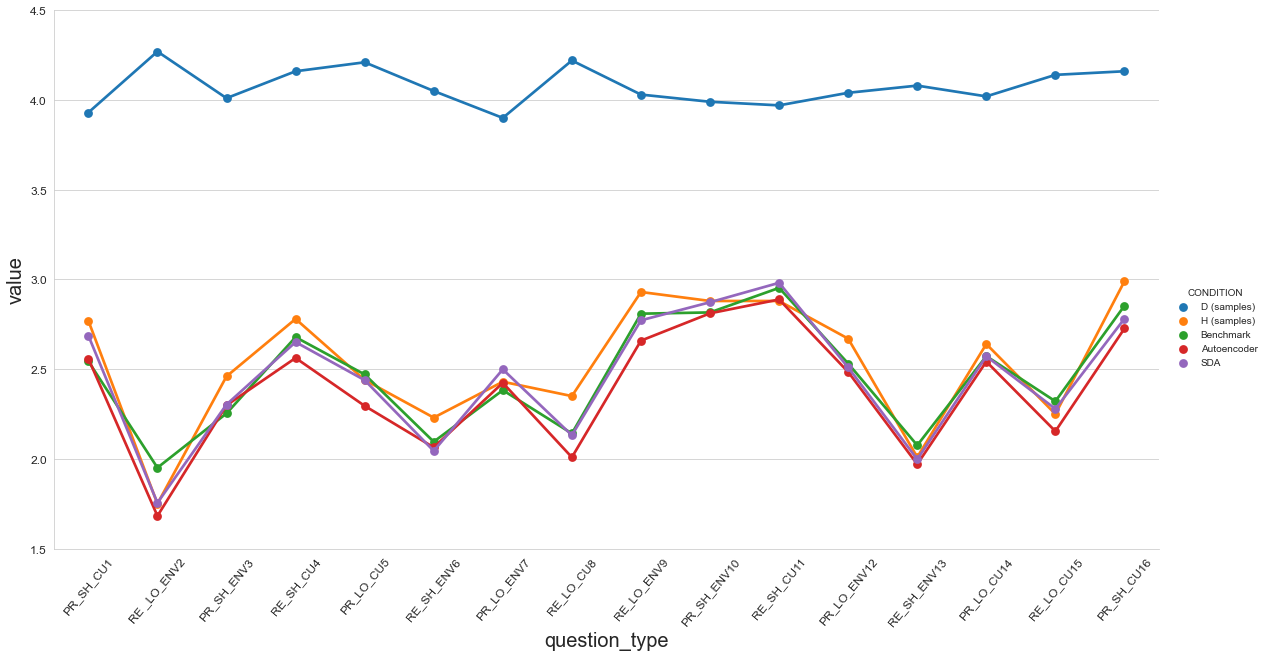

In [34]:
plt_mean = sns.catplot(
        data=pd.melt(pred_mean, id_vars=['CONDITION'],var_name='question_type'),
        x="question_type", y="value",
        hue="CONDITION",
        kind='point',aspect=2,height=8
        )
plt_mean.set_xlabels(fontsize=20)
plt_mean.set_xticklabels(rotation=50,fontsize=12)
plt_mean.set_ylabels(fontsize=20)
plt_mean.set_yticklabels(fontsize=12)
plt.show()

Carefully observing the plot we can deduce that the benchmark strategy in many cases (question types) outperformed the other two DL models in average, e.g. RE_SH_CU4, PR_SH_CU16 ect. There was no clear relationship between these question types. Then we see that where the DL models reconstructed almost perfectly the scores in average, RE_LO_ENV2 and RE_SH_ENV13, are related to ***retrospective and environment cued*** responses and in which we had the ***lowest honest scores in average***. It's quite surprising to note that these questions are very similar and differ from each other only for how much event occurrences are distant in time:
- _Do you fail to recognize a place you have visited before?_ 
- _Do you look at something without realizing you have seen it moments before?_

We can also observe that, since we trained the models using all the data, ***the SDA seems to overfit the H curve*** whereas Autoencoder tries to generalize more, this phenomenon re-confirms what we obtained in the previous section.

## References
<div id="refer-anchor-1"></div>

[1] Walczyk Jeffrey, Sewell Nate, Dibenedetto Megan. (2018). A Review of Approaches to Detecting Malingering in Forensic Contexts and Promising Cognitive Load-Inducing Lie Detection Techniques. Frontiers in Psychiatry, 9, 700. https://doi.org/10.3389/fpsyt.2018.00700


<div id="refer-anchor-2"></div>

[2] Merylin Monaro, Stéphanie Maldera, Cristina Scarpazza, Giuseppe Sartori, Nicolò Navarin. (2022). Detecting deception through facial expressions in a dataset of videotaped interviews: A comparison between human judges and machine learning models. Computers in Human Behavior, 127, 107063. https://doi.org/10.1016/j.chb.2021.107063


<div id="refer-anchor-3"></div>

[3] Pace Giorgia, Orrù Graziella, Monaro Merylin, Gnoato Francesca, Vitaliani Roberta, Boone Kyle B., Gemignani Angelo, Sartori Giuseppe (2019). Malingering Detection of Cognitive Impairment With the b Test Is Boosted Using Machine Learning. Frontiers in Psychology, 10, 1650. https://doi.org/10.3389/fpsyg.2019.01650 


<div id="refer-anchor-4"></div>

[4] Pascal Vincent, Hugo Larochelle, Yoshua Bengio, Pierre-Antoine Manzagol. (2008). Extracting and composing robust features with denoising autoencoders. In Proceedings of the 25th international conference on Machine learning (ICML '08). Association for Computing Machinery, 1096–1103. https://doi.org/10.1145/1390156.1390294


<div id="refer-anchor-5"></div>

[5] Matteo Cardaioli, Stefano Cecconello, Merylin Monaro, Giuseppe Sartori, Mauro Conti, Graziella Orru. (2021). Malingering Remover: High Accuracy Reconstruction of Honest Responses from Malingered Responses with Machine Learning. In publishing paper.

